In [8]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from prophet import Prophet
%matplotlib inline

c:\Users\emanuel.holgersson\Anaconda3\envs\time_series\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df_train = pd.read_csv("./sales_data/train.csv")
df_train.date = pd.to_datetime(df_train['date'])
df_train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


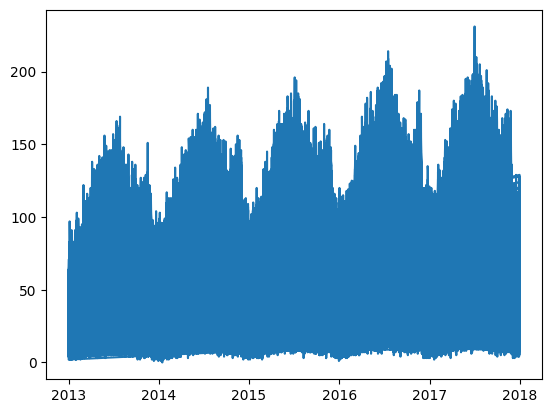

In [3]:
plt.plot(df_train.date, df_train.sales)

<Axes: xlabel='date'>

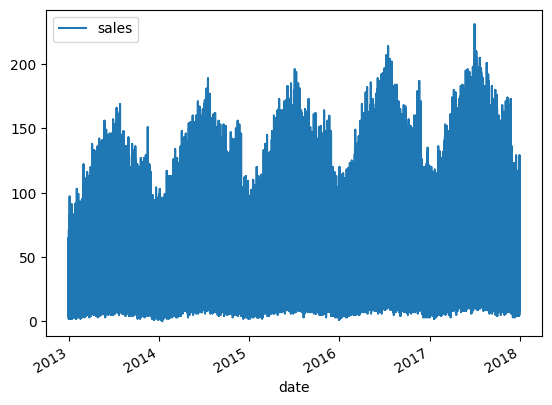

In [4]:
df_train.plot('date' , 'sales')

In [5]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day_of_week'] = df_train['date'].dt.day_of_week
df_train['dayofweek'] = df_train['date'].dt.dayofweek
df_train.head()

,date,store,item,sales,year,month,day_of_week,dayofweek
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


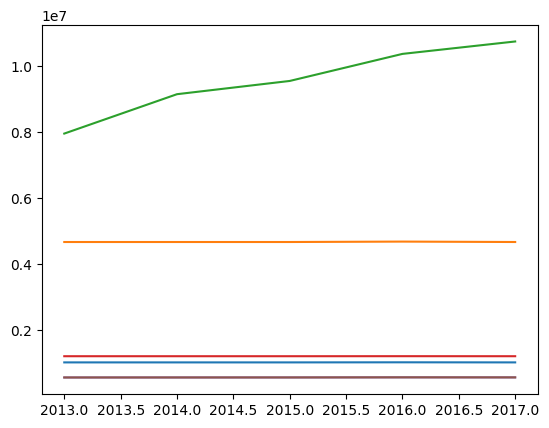

In [6]:
plt.plot(df_train.year.unique(), df_train.groupby('year').sum('sales'))

In [9]:
# instantiate the model and set parameters
model = Prophet(
 interval_width=0.95,
 growth='linear',
 daily_seasonality=False,
 weekly_seasonality=True,
 yearly_seasonality=True,
 seasonality_mode='multiplicative'
)

In [11]:
df_history = df_train[["date", "sales"]]
df_history.rename(columns={"date":'ds', "sales":'y'}, inplace=True)
df_history

C:\Users\emanuel.holgersson\AppData\Local\Temp\ipykernel_26688\643796824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_history.rename(columns={"date":'ds', "sales":'y'}, inplace=True)


,ds,y
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
912995,2017-12-27,63
912996,2017-12-28,59
912997,2017-12-29,74
912998,2017-12-30,62


In [12]:
model.fit(df_history)

14:53:16 - cmdstanpy - INFO - Chain [1] start processing


In [ ]:
future_pd = model.make_future_dataframe(
 periods=90,
 freq='d',
 include_history=True
)
# predict over the dataset
forecast_pd = model.predict(future_pd)